In [1]:
import torch
import torch.nn as nn
from hyperparams_and_args import data_dir

from GNN2.train_single_step_CNN_Data import evaluate
from data_handling.data_handler_CNN_data import IndexLoader
from plotting import plot_time_series, heatmap_of_edges
import warnings
warnings.filterwarnings("ignore")  # or use: "once"

In [2]:
model_dir = "models/exp2/"

In [3]:
def eval_model(filepath, device="cuda:0"):
    filepath = model_dir + filepath
    device = torch.device(device)
    model = torch.load(filepath, map_location=device)
    model.eval()
    model.update_device(device)
    args = model.args

    Data = IndexLoader(args, test_set="GODAS", device=device, start_date="1984-01", end_date="2017-12", data_dir=data_dir, transfer=True)

    evaluateL2 = nn.MSELoss().to(args.device)
    evaluateL1 = nn.L1Loss().to(args.device)
    test_acc, test_rae, _, oni_test_stats, preds, Ytrue = evaluate(Data, Data.test[0], Data.test[1],
                                                                               model, evaluateL2, evaluateL1, args,
                                                                               return_oni_preds=True)
    print(f"Exp2: {args.horizon} lead months",  "Test stats... OVERALL: rse {:5.4f} , RMSE {:5.4f}"
                    " | ONI:  RMSE {:5.4f} , corr {:5.4f}"
          .format(test_acc, test_rae, oni_test_stats["RMSE"], oni_test_stats["Corrcoef"]))
    heatmap_of_edges(file_path=filepath, min_weight=1e-4, data_dir=data_dir, region="world")

    # PLot ONI timeseries
    plot_time_series(Ytrue, preds, time_steps=Data.semantic_time_steps, labels=["GODAS ONI", "GNN Forecast"],
                     ylabel=f"{args.index} index",  save_to=None)


Exp2: 1 lead months Test stats... OVERALL: rse 0.0521 , RMSE 0.2277 | ONI:  RMSE 0.2277 , corr 0.9747
# Nonzero Edges: 19761


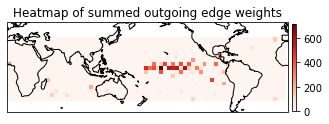

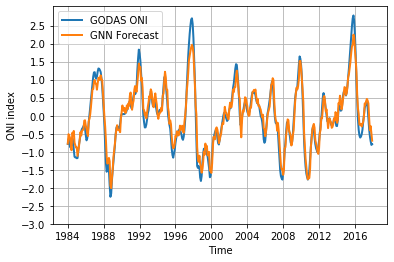

In [4]:
filepath = "1lead_ONI_-40-40lats_0-360lons_3w2L2gcnDepth2dil_32bs0.1d0normed_prelu_50epPRETRAINED_50epTRAIN-CONCAT.pt"
eval_model(filepath)

Exp2: 3 lead months Test stats... OVERALL: rse 0.1804 , RMSE 0.4237 | ONI:  RMSE 0.4237 , corr 0.8908
# Nonzero Edges: 19800


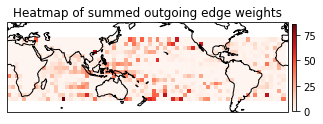

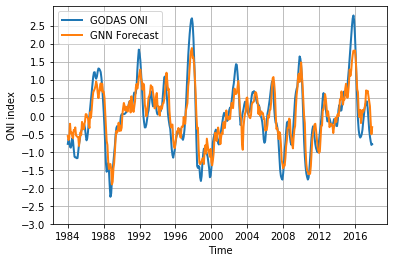

In [7]:
filepath = "3lead_ONI_-40-40lats_0-360lons_3w2L2gcnDepth2dil_32bs0.1d0normed_prelu_75epPRETRAINED_50epTRAIN-CONCAT.pt"
eval_model(filepath)

Exp2: 6 lead months Test stats... OVERALL: rse 0.3875 , RMSE 0.6200 | ONI:  RMSE 0.6200 , corr 0.7420
# Nonzero Edges: 19800


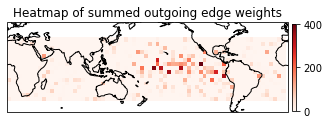

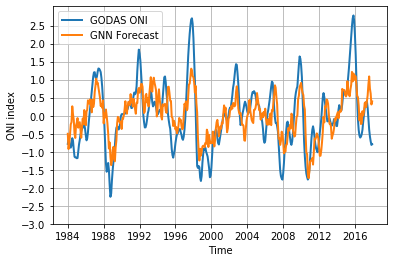

In [9]:
filepath = "6lead_ONI_-40-40lats_0-360lons_3w2L2gcnDepth2dil_32bs0.1d0normed_prelu_100epPRETRAINED_150epTRAIN-CONCAT.pt"
eval_model(filepath)

Exp2: 12 lead months Test stats... OVERALL: rse 0.5794 , RMSE 0.7605 | ONI:  RMSE 0.7605 , corr 0.5547
# Nonzero Edges: 19789


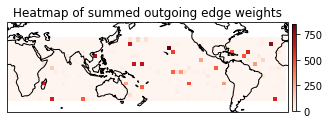

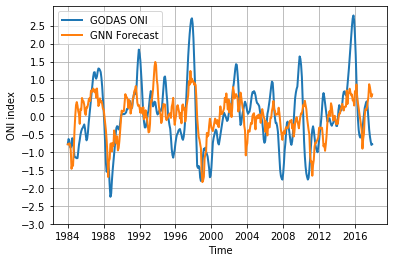

In [10]:
filepath = "12lead_ONI_-40-40lats_0-360lons_3w3L2gcnDepth2dil_32bs0.1d0normed_prelu_100epPRETRAINED_150epTRAIN-CONCAT.pt"
eval_model(filepath)

In [ ]:
filepath = ""
eval_model(filepath)